# LP2 - A Classification Project on Telecommunication Customers Churn
In this project, We would be analysing Zanzibar telecommunication customer datasets with the aim of increasing profit / revenue margin by improving on their customer retention strategies. We will be using machine learning classification models to perform churn analysis on their customers. The CRISP-DM Framework would be the main guide to this project. 

## Business Understanding

### Introduction
Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones. Once you can identify those customers that are at risk of cancelling, you should know exactly what marketing action to take for each individual customer to maximise the chances that the customer will remain.

Different customers exhibit different behaviours and preferences, so they cancel their subscriptions for various reasons. It is critical, therefore, to proactively communicate with each of them in order to retain them in your customer list. You need to know which marketing action will be the most effective for each and every customer, and when it will be most effective.

### Problem Statement
The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. Three main strategies have been proposed to generate more revenues: (1) acquire new customers, (2) upsell the existing customers, and (3) increase the retention period of customers. However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy, proves that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as “the customer movement from one provider to another”.

Customers’ churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent potentially large additional revenue source if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.



### Objectives
* Analyze patterns and trends related to customer attrition or churn.
* Identify factors influencing churn rate among non-senior citizens.
* To investigate the prediction of customer attrition in Zanzibar telecommunication using machine learning.
* To compare the algorithms/models that are effective in predicting churn rate in Zanzibar telecom company.
* Provide actionable solutions for addressing customer churn based on the model's results.

## Data Understanding

The "Data Understanding" phase in the CRISP-DM framework involves  We will explore and understand the datasets to gain insights into its structure, content, and quality. This phase helps you identify potential issues and understand the data's suitability for building predictive models.

 Load Datasets(Collect Initial Data) by:
 * Import the necessary libraries
* Retrieving login credential from .env & connecting to a database
* Load into a pandas DataFrame for manipulation and cleaning
 Exploratory Data Analysis by performing:
 * Check first 5 rows of the 3 Datasets by using the .head()
* Check last 5 rows of the 3 Datasets by using the .head()
* Check 10 randows rows of the 3 Datasets by using the .head()
* Check the shape of the 3 Datasets by using the .head()
* Get information on the 3 datasets such as Datatype by using the .info()
* Check for Duplicates in the 3 datasets by using the .head()
* Check for Missing values by using the .head()
* Perform a Descriptive analysis on the 3 Datasets by using the .head()
 Data Quality Assessment by :
Identify key data Quality issues.


### Load Datasets(Collect Initial Data)
* Import the necessary libraries
* Retrieving login credential from .env & connecting to a database
* Load into a pandas DataFrame for manipulation and cleaning

#### Import Necessary libraries

In [86]:
# Load the libraries/modules

# For data manipulation and cleaning
import pandas as pd # a tool for data analysis and manipulation.
import numpy as np # a tool for numerical computations.


# For data visualizations
import matplotlib.pyplot as plt # a tool for ploting graphs/charts.
import seaborn as sns # a tool built on matplotlib for plotting graphs/charts.
import plotly.express as px


# For Statistical testing
import statsmodels.api as sm
from statsmodels.formula.api import ols # for statistical analysis

# Hypothesis testing
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# For Feature Engineering & ML modeling
from sklearn.compose import ColumnTransformer # Helps to transform the features
from sklearn.impute import SimpleImputer # For imputing missing values
from sklearn.pipeline import Pipeline # for automation of the preprocessing and feature engineering
from sklearn.preprocessing import OneHotEncoder # For encoding categorical data
from sklearn.preprocessing import StandardScaler # for scaling numerical data


from sklearn.metrics import classification_report, confusion_matrix #
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE # For solving class imbalance.


# Machine Learning models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Interpreting model predictions
import shap
from sklearn.datasets import load_iris

# Other supporting libraries
import pyodbc #  helps in making access to SQL Server database simple.
import openpyxl
from dotenv import dotenv_values # helps to get login credential to the database.

import warnings # Hiding not too major the warnings.
warnings.filterwarnings('ignore')

#### Retrieving Login Credential from .env & connecting to a Database

In [3]:
# Create an environment to store sentitive information
environment_variables = dotenv_values('.env')

database_name = environment_variables.get('DATABASE')
server_name   = environment_variables.get('SERVER')
user_name     = environment_variables.get('UID')
password      = environment_variables.get('PWD')

connection_string = f'DRIVER={{SQL Server}};DATABASE={database_name};SERVER={server_name};UID={user_name};PWD={password};'

In [4]:
# Connecting to the Database
connection = pyodbc.connect(connection_string)

#### Load into a pandas Dataframe

In [5]:
# Loading the data in pandas to work on.
query ='SELECT * FROM dbo.LP2_Telco_churn_first_3000'

data_1 = pd.read_sql(query, connection)
data_2 = pd.read_excel('C:/Users/USER8/Desktop/Azubi Africa/Career Accelerator/LP2/LP2 Project/Telco-churn-second-2000.xlsx')
data_3 = pd.read_csv('C:/Users/USER8/Desktop/Azubi Africa/Career Accelerator/LP2/LP2 Project/LP2_Telco-churn-last-2000.csv')


### Exploratory Data Analysis
* Check first 5 rows of the 3 Datasets by using the .head()
* Check last 5 rows of the 3 Datasets by using the .head()
* Check 10 randows rows of the 3 Datasets by using the .head()
* Check the shape of the 3 Datasets by using the .head()
* Get information on the 3 datasets such as Datatype by using the .info()
* Check for Duplicates in the 3 datasets by using the .head()
* Check for Missing values by using the .head()
* Perform a Descriptive analysis on the 3 Datasets by using the .head()
* Check for unique valuesby using .nunique()
* Check for class imbalance
* Visualise some of the features

#### Data_1

##### View first 5 rows

In [5]:
# .head() shows the first 5 rows of the dataset.
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


##### View last 5 rows

In [ ]:
# .tail() shows the last 5 rows of the dataset.
data_1.tail()

##### View 10 random rows

In [ ]:
# .sample() shows five random rows in the dataset. We will be looking at 10 random rows by putting 10 in the parentheses.
data_1.sample(10)

##### Display total rows & columns

In [ ]:
# .shape shows the total number of rows and columns(including the index) of the dataset.
data_1.shape

##### Get Data Information

In [ ]:
# .info() gives summary information about the dataset.
data_1.info()

##### Check for duplicates

In [ ]:
data_1[data_1.duplicated()]

In [ ]:
data_1.duplicated().sum()

##### Check for missing values

In [ ]:
#.isna().sum()
data_1.isna().sum()

In [ ]:
percent_missing1 = (data_1.isnull().sum() / len(data_1)) * 100
percent_missing1

##### Descriptive Analysis

In [ ]:
data_1.describe(include='all').T

##### Check for unique values

In [ ]:
Data1_uni_vals = data_1.nunique()

for column, count in Data1_uni_vals.items():
    print(f"Column: {column}, Unique values: {count}")

#### Data Assessment of Data_1
1. By using the .head(), .tail() and .sample(), we observe that the columns are arranged in the order below with the following responses(input):
    * customerID = Object(string)
    * gender = Male and Female
    * SeniorCitizen = True and False
    * Partner = True and False
    * Dependent = True and False
    * tenure = integer
    * PhoneService = True and False
    * MultipleLines = True, False and None
    * InternetService = DSL, Fibre optic and No
    * OnlineSecurity = True, False and None
    * OnlineBackup = True and False
    * DeviceProtection = True, False and None
    * TechSupport = True, False and None
    * StreamingTV = True, False and None
    * StreamingMovies = True, False and None
    * Contract = Month-to-month, One year and Two year
    * PaperlessBilling = True and False
    * PaymentMethod = Bank transfer (automatic), Credit card (automatic), Electronic check and Mailed check
    * MonthlyCharges = Float
    * TotalCharges = Float
    * Churn = True and False
    
    
2. By using the .shape, we get to understand that there are 3000 rows (customers) with a total of 21 columns (attributes/features).

3. By using the .info() we get a deep understanding of total number of entries, total number of columns, column names, the datatype and memory usage. This helps us to further understand the .head(), .tail() and .sample() used. we observe that the total number of entries are 3000 (ranging from 0-2999), the columns in total are 21 (stated above in 1), having a total of 13 object, 5 boolean, 2 floats, 1 integer and the memory used is 389.8+ KB as shown below:

   * customerID = object 
   * gender = object 
   * SeniorCitizen = bool   
   * Partner = bool   
   * Dependents = bool   
   * tenure = int64  
   * PhoneService = bool   
   * MultipleLines = object 
   * InternetService = object 
   * OnlineSecurity = object 
   * OnlineBackup = object 
   * DeviceProtection = object 
   * TechSupport = object 
   * StreamingTV = object 
   * StreamingMovies = object 
   * Contract = object 
   * PaperlessBilling = bool   
   * PaymentMethod = object 
   * MonthlyCharges = float64
   * TotalCharges = float64
   * Churn = object 
   

4. By using the data_1.duplicated() and data_1.duplicated().sum() the data_1 has no duplicates.

5. By using the .isna().sum() and calculating the percentage of missing values, we observed that there were some missing values in data_1 which were found in the columns below:
   
   Column name with the total number of missing values:
   
   * MultipleLines   =    269
   * OnlineSecurity   =   651
   * OnlineBackup        651
   * DeviceProtection  =  651
   * TechSupport    =     651
   * StreamingTV     =    651
   * StreamingMovies  =   651
   * TotalCharges     =     5
   * Churn         =        1
   
   Column name with the percentage of missing values:
   
   * MultipleLines   =    8.966667%
   * OnlineSecurity   =   21.700000%
   * OnlineBackup   =     21.700000%
   * DeviceProtection  =  21.700000%
   * TechSupport   =      21.700000%
   * StreamingTV    =     21.700000%
   * StreamingMovies  =   21.700000%
   * TotalCharges   =      0.166667%
   * Churn         =       0.033333%
   
   
5. data_1.describe(include='all').T
6. data_1.nunique()


#### Data_2

##### View first 5 rows

In [17]:
# .head() shows the first 5 rows of the dataset.
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


##### View last 5 rows

In [18]:
# .tail() shows the last 5 rows of the dataset.
data_2.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35
1999,1699-TLDLZ,Female,0,Yes,Yes,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,301.55


##### View 10 random rows

In [19]:
# .sample() shows five random rows in the dataset. We will be looking at 10 random rows by putting 10 in the parentheses.
data_2.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1876,5923-GXUOC,Male,0,No,No,10,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,1081.45
218,6869-FGJJC,Male,0,No,No,68,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Credit card (automatic),79.60,5461.45
1163,9253-VIFJQ,Male,0,Yes,No,65,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,One year,No,Credit card (automatic),67.05,4309.55
1521,8671-KKKOS,Female,0,Yes,No,46,No,No phone service,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,No,Electronic check,45.55,2062.15
898,2332-TODQS,Female,0,No,No,48,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),25.05,1171.5
831,6946-LMSQS,Male,1,Yes,No,25,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,One year,Yes,Electronic check,89.05,2177.45
1295,3740-RLMVT,Male,1,Yes,No,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),60.95,4119.4
1688,2988-GBIVW,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.85,6470.1
543,0853-TWRVK,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),105.60,7581.5
1033,5196-WPYOW,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05


##### Display total rows & columns

In [20]:
# .shape shows the total number of rows and columns(including the index) of the dataset.
data_2.shape

(2000, 20)

##### Get Data Information

In [21]:
# .info() gives summary information about the dataset.
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


##### Check for duplicates

In [22]:
data_2[data_2.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [23]:
data_2.duplicated().sum()

0

##### Check for missing values

In [24]:
data_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [25]:
percent_missing2 = (data_2.isnull().sum() / len(data_2)) * 100
percent_missing2

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64

##### Descriptive analysis

In [26]:
data_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,2000,2000,7613-LLQFO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2000,2,Female,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,2000.0,NaN,NaN,NaN,0.1615,0.368084,0.0,0.0,0.0,0.0,1.0
Partner,2000,2,No,1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,2000,2,No,1451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,2000.0,NaN,NaN,NaN,31.853,24.632677,0.0,8.0,27.0,55.0,72.0
PhoneService,2000,2,Yes,1807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2000,3,No,966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,2000,3,Fiber optic,848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2000,3,No,991,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Check for unique values

In [27]:
Data2_uni_vals = data_2.nunique()

for column, count in Data2_uni_vals.items():
    print(f"Column: {column}, Unique values: {count}")

Column: customerID, Unique values: 2000
Column: gender, Unique values: 2
Column: SeniorCitizen, Unique values: 2
Column: Partner, Unique values: 2
Column: Dependents, Unique values: 2
Column: tenure, Unique values: 73
Column: PhoneService, Unique values: 2
Column: MultipleLines, Unique values: 3
Column: InternetService, Unique values: 3
Column: OnlineSecurity, Unique values: 3
Column: OnlineBackup, Unique values: 3
Column: DeviceProtection, Unique values: 3
Column: TechSupport, Unique values: 3
Column: StreamingTV, Unique values: 3
Column: StreamingMovies, Unique values: 3
Column: Contract, Unique values: 3
Column: PaperlessBilling, Unique values: 2
Column: PaymentMethod, Unique values: 4
Column: MonthlyCharges, Unique values: 986
Column: TotalCharges, Unique values: 1930


#### Data Assessment of Data_2
1. By using the .head(), .tail() and .sample(), we observe that the columns are arranged in the order below with the following responses(input):
    * customerID = Object(string)
    * gender = Male and Female
    * SeniorCitizen = 0 and 1
    * Partner = Yes and No
    * Dependent = Yes and No
    * tenure = integer
    * PhoneService = Yes and No
    * MultipleLines = Yes, No and No phone service
    * InternetService = DSL, Fibre optic and No
    * OnlineSecurity = Yes and No and No internet service
    * OnlineBackup = Yes and No and No internet service
    * DeviceProtection = Yes and No and No internet service
    * TechSupport = Yes and No and No internet service
    * StreamingTV = Yes and No and No internet service
    * StreamingMovies = Yes and No and No internet service
    * Contract = Month-to-month, One year and Two year
    * PaperlessBilling = Yes and No
    * PaymentMethod = Bank transfer (automatic), Credit card (automatic), Electronic check and Mailed check
    * MonthlyCharges = Float
    * TotalCharges = Float
    
2. By using the .shape, we get to understand that there are 2000 rows (customers) with a total of 20 columns (attributes/features).

3. By using the .info() we get a deep understanding of total number of entries, total number of columns, column names, the datatype and memory usage. This helps us to further understand the .head(), .tail() and .sample() used. we observe that the total number of entries are 2000 (ranging from 0-1999), the columns in total are 20 (stated above in 1), having a total of 17 object, 2 integer, 1 floats and the memory used is 312.6+ KB as shown below:

   * customerID = object 
   * gender = object 
   * SeniorCitizen = integer   
   * Partner = object   
   * Dependents = object   
   * tenure = integer  
   * PhoneService = object   
   * MultipleLines = object 
   * InternetService = object 
   * OnlineSecurity = object 
   * OnlineBackup = object 
   * DeviceProtection = object 
   * TechSupport = object 
   * StreamingTV = object 
   * StreamingMovies = object 
   * Contract = object 
   * PaperlessBilling = object   
   * PaymentMethod = object 
   * MonthlyCharges = float64
   * TotalCharges = object
   

4. By using the data_2.duplicated() and data_2.duplicated().sum(), it was observed that the data_2 has no duplicates.

5. By using the .isna().sum() and calculating the percentage of missing values, we observed that there were no missing values in data_2.
   
   
5. data_1.describe(include='all').T
6. data_1.nunique()

#### Data_3

##### View first 5 rows

In [28]:
# .head() shows the first 5 rows of the dataset.
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


##### View last 5 rows

In [29]:
# .tail() shows the last 5 rows of the dataset.
data_3.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
2042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


##### View 10 random rows

In [30]:
# .sample() shows five random rows in the dataset. We will be looking at 10 random rows by putting 10 in the parentheses.
data_3.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
824,5321-NTRKC,Male,0,Yes,Yes,66,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),79.85,5234.95,No
635,2087-QAREY,Female,0,Yes,No,22,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.70,1178.75,No
1165,0644-OQMDK,Male,1,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.65,293.85,No
1563,6906-ANDWJ,Male,0,Yes,Yes,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.90,1107.25,Yes
724,8042-JVNFH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,71.35,71.35,Yes
136,3295-YVUSR,Male,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,72.60,154.3,No
1140,0178-CIIKR,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,58,No
796,8571-ZCMCX,Female,0,Yes,Yes,47,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),60.00,2768.65,No
331,5583-EJXRD,Male,0,Yes,Yes,44,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),54.05,2375.2,No
964,9782-LGXMC,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),61.75,3024.15,No


##### Display total rows & columns

In [31]:
# .shape shows the total number of rows and columns(including the index) of the dataset.
data_3.shape

(2043, 21)

##### Get Data Information

In [32]:
# .info() gives summary information about the dataset.
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


##### Check for duplicates

In [33]:
data_3[data_3.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [34]:
data_3.duplicated().sum()

0

##### Check for missing values

In [35]:
data_3.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
percent_missing3 = (data_3.isnull().sum() / len(data_3)) * 100
percent_missing3

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

##### Descriptive analysis

In [37]:
data_3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,2043,2043,5600-PDUJF,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2043,2,Male,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,2043.0,NaN,NaN,NaN,0.16838,0.374295,0.0,0.0,0.0,0.0,1.0
Partner,2043,2,No,1047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,2043,2,No,1412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,2043.0,NaN,NaN,NaN,32.649046,24.376248,0.0,9.0,30.0,55.0,72.0
PhoneService,2043,2,Yes,1823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2043,3,No,987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,2043,3,Fiber optic,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2043,3,No,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Check for unique values

In [38]:
Data3_uni_vals = data_3.nunique()
for column, count in Data3_uni_vals.items():
    print(f"Column: {column}, Unique values: {count}")

Column: customerID, Unique values: 2043
Column: gender, Unique values: 2
Column: SeniorCitizen, Unique values: 2
Column: Partner, Unique values: 2
Column: Dependents, Unique values: 2
Column: tenure, Unique values: 73
Column: PhoneService, Unique values: 2
Column: MultipleLines, Unique values: 3
Column: InternetService, Unique values: 3
Column: OnlineSecurity, Unique values: 3
Column: OnlineBackup, Unique values: 3
Column: DeviceProtection, Unique values: 3
Column: TechSupport, Unique values: 3
Column: StreamingTV, Unique values: 3
Column: StreamingMovies, Unique values: 3
Column: Contract, Unique values: 3
Column: PaperlessBilling, Unique values: 2
Column: PaymentMethod, Unique values: 4
Column: MonthlyCharges, Unique values: 1029
Column: TotalCharges, Unique values: 1991
Column: Churn, Unique values: 2


#### Data Assessment of Data_3
1. By using the .head(), .tail() and .sample(), we observe that the columns are arranged in the order below with the following responses(input):
    * customerID = Object(string)
    * gender = Male and Female
    * SeniorCitizen = 0 and 1
    * Partner = Yes and No
    * Dependent = Yes and No
    * tenure = integer
    * PhoneService = Yes and No
    * MultipleLines = Yes, No and No phone service
    * InternetService = DSL, Fibre optic and No
    * OnlineSecurity = Yes and No and No internet service
    * OnlineBackup = Yes and No and No internet service
    * DeviceProtection = Yes and No and No internet service
    * TechSupport = Yes and No and No internet service
    * StreamingTV = Yes and No and No internet service
    * StreamingMovies = Yes and No and No internet service
    * Contract = Month-to-month, One year and Two year
    * PaperlessBilling = Yes and No
    * PaymentMethod = Bank transfer (automatic), Credit card (automatic), Electronic check and Mailed check
    * MonthlyCharges = Float
    * TotalCharges = Float
    * Churn = Yes and No
    
2. By using the .shape, we get to understand that there are 2043 rows (customers) with a total of 21 columns (attributes/features).

3. By using the .info() we get a deep understanding of total number of entries, total number of columns, column names, the datatype and memory usage. This helps us to further understand the .head(), .tail() and .sample() used. we observe that the total number of entries are 2043 (ranging from 0-2042), the columns in total are 21 (stated above in 1), having a total of 18 object, 2 integer, 1 floats and the memory used is 335.3+ KB as shown below:

   * customerID = object 
   * gender = object 
   * SeniorCitizen = integer   
   * Partner = object   
   * Dependents = object   
   * tenure = integer  
   * PhoneService = object   
   * MultipleLines = object 
   * InternetService = object 
   * OnlineSecurity = object 
   * OnlineBackup = object 
   * DeviceProtection = object 
   * TechSupport = object 
   * StreamingTV = object 
   * StreamingMovies = object 
   * Contract = object 
   * PaperlessBilling = object   
   * PaymentMethod = object 
   * MonthlyCharges = float64
   * TotalCharges = object
   * Churn = object
   

4. By using the data_2.duplicated() and data_2.duplicated().sum(), it was observed that the data_2 has no duplicates.

5. By using the .isna().sum() and calculating the percentage of missing values, we observed that there were no missing values in data_2.
   
   
5. data_1.describe(include='all').T
6. data_1.nunique()

In this project, we want to predict whether the customer who are not senior citizens will churn or not, so let’s look at the SeniorCitizen and churn column.

#### Previewing SeniorCitizen

In [6]:
# perform a value count on data_1 to show the total number of customers who are senior citizens or not.
data_1['SeniorCitizen'].value_counts().reset_index()

,SeniorCitizen,count
0,False,2525
1,True,475


In [7]:
# CHeck for the percent of customers who are senior citizens
percent1 = data_1['SeniorCitizen'].value_counts()/ len(data_1['SeniorCitizen']) * 100
percent1

SeniorCitizen
False    84.166667
True     15.833333
Name: count, dtype: float64

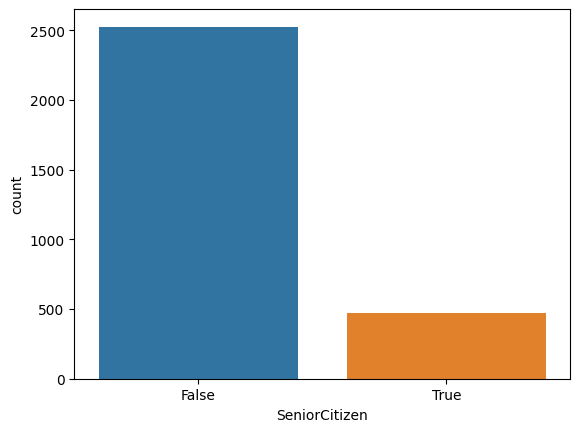

In [8]:
# plot your result
sns.countplot(x="SeniorCitizen", data=data_1)
plt.show()

In [9]:
# perform a value count on data_3 to show the total number of customers who are senior citizens or not.
data_3['SeniorCitizen'].value_counts().reset_index()

,SeniorCitizen,count
0,0,1699
1,1,344


In [10]:
# CHeck for the percent of customers who are senior citizens
percent3 = data_3['SeniorCitizen'].value_counts()/ len(data_3['SeniorCitizen']) * 100
percent3

SeniorCitizen
0    83.162017
1    16.837983
Name: count, dtype: float64

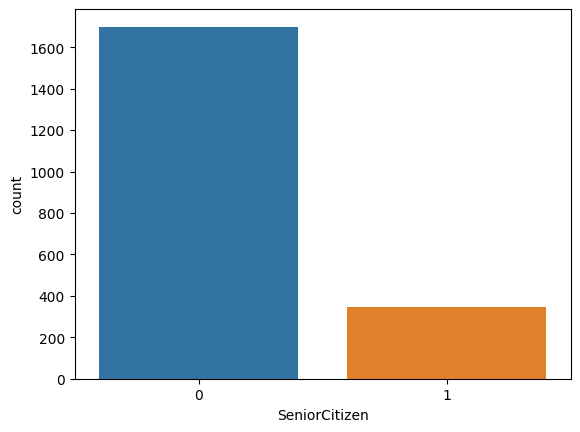

In [11]:
# Plot on a barchart
sns.countplot(x="SeniorCitizen", data=data_3)
plt.show()

#### Previewing Churn

In [12]:
# perform a value count to show the total number of customers who churned or not.
churn_1 = data_1['Churn'].value_counts().reset_index()
churn_1

,Churn,count
0,False,2219
1,True,780


In [14]:
# churn rate = (total number of lost customers / total number of customers) * 100
churn_rate = (data_1['Churn'].value_counts() / len(data_1)) * 100
churn_rate

Churn
False    73.966667
True     26.000000
Name: count, dtype: float64

In [15]:
# Calculate the count of each 'Churn' value
churn_count = data_1['Churn'].value_counts()

In [16]:
# Convert the count into a DataFrame for easier plotting
churn_count_df = churn_count.reset_index()
churn_count_df.columns = ['Churn', 'count']

In [17]:
# perform a value count to show the total number of customers who churned or not.
churn_2 = data_3['Churn'].value_counts().reset_index()
churn_2

,Churn,count
0,No,1487
1,Yes,556


In [18]:
# churn rate = (total number of lost customers / total number of customers) * 100
churn_rate1 = (data_3['Churn'].value_counts() / len(data_3)) * 100
churn_rate1

Churn
No     72.78512
Yes    27.21488
Name: count, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

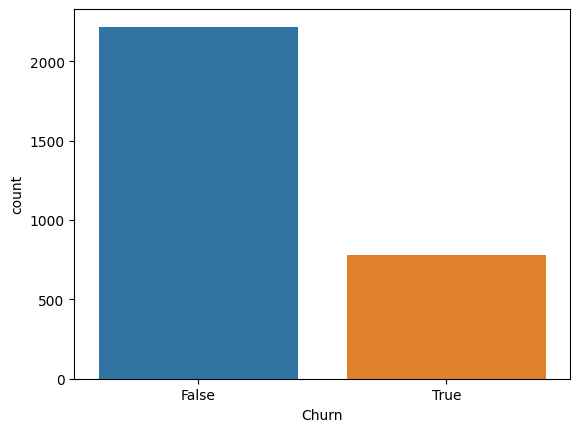

In [19]:
#Plot on a barchat
sns.barplot(x = churn_1['Churn'], y = churn_1['count'])

### Data Quality Assessment 
 * Inconsistencies in the data values with regards to the following columns of the 3 datasets:
   |Column Name       |Data_1               |Data_2                         |Data_3                         |
   |------------------|---------------------|-------------------------------|-------------------------------|
   |SeniorCitizen     |True and False       | 0 and 1                       | 0 and 1                       |
   |Partner           |True and False       |Yes and No                     |Yes and No                     |
   |Dependent         |True and False       |Yes and No                     |Yes and No                     |
   |PhoneService      |True and False       |Yes and No                     |Yes and No                     |
   |MultipleLines     |True, False and None |Yes, No and No phone service   |Yes, No and No phone service   |
   |OnlineSecurity    |True, False and None |Yes, No and No internet service|Yes, No and No internet service|
   |OnlineBackup      |True, False and None |Yes, No and No internet service|Yes, No and No internet service|
   |DeviceProtection  |True, False and None |Yes, No and No internet service|Yes, No and No internet service|
   |TechSupport       |True, False and None |Yes, No and No internet service|Yes, No and No internet service|
   |StreamingTV       |True, False and None |Yes, No and No internet service|Yes, No and No internet service|
   |PaperlessBilling  |True and False       |Yes and No                     |Yes and No                     |
   |Churn             |True and False       |No column                      |Yes and No                     |
    
* Inconsistencies in the data types with regards to thte following columns of the 3 datasets:
    
   |Column Name            |Data_1              |Data_2             |Data_3 |
   |-----------------------|--------------------|-------------------|-------|
   |SeniorCitizen          |bool                |integer            |integer|
   |Partner                |bool                |object             |object |
   |Dependent              |bool                |object             |object |
   |PhoneService           |bool                |object             |object |
   |PaperlessBilling       |bool                |object             |object |
   |TotalCharges           |float               |object             |object |
    
* Missing values and percentage of missing values of data_1

   |Column Name            |Data_1 |Data_1%        |Data_2  |Data_2%|Data_3|Data_3%|
   |-----------------------|-------|---------------|--------|-------|------|-------|
   |MultipleLines          |269    |8.966667%      |0       |0      |0     |0      |
   |OnlineSecurity         |651    |21.700000      |0       |0      |0     |0      |
   |OnlineBackup           |651    |21.700000      |0       |0      |0     |0      |
   |DeviceProtection       |651    |21.700000      |0       |0      |0     |0      |
   |TechSupport            |651    |21.700000      |0       |0      |0     |0      |
   |StreamingTV            |651    |21.700000      |0       |0      |0     |0      |
   |StreamingMovies        |651    |21.700000      |0       |0      |0     |0      |
   |TotalCharges           |5      |21.700000      |0       |0      |0     |0      |
   |Churn                  |1      |21.700000      |0       |0      |0     |0      |
    
* Class Imbalance
Class imbalance in a dataset involves analyzing the distribution of the target variable's classes to determine whether one class is significantly more prevalent than the others. To determine the 


### Formulate Hypothesis
Hypothesis: Churning Potential for Non-Senior Citizens

H0:
The churning potential (likelihood of churn) among non-senior citizens is not influenced by factors such as Gender, internet service type, Payment method, Contract, monthly charges, tenure, and the presence of additional services like online security or tech support.

H1:
The churning potential (likelihood of churn) among non-senior citizens is influenced by factors such as Gender, internet service type, Payment method, Contract, monthly charges, tenure, and the presence of additional services like online security or tech support.


### Research Questions

1. What is the overall churn rate among non-senior citizens?
2. What is the proportion of non-senior citizens who churned based on their gender?
3. What is the average tenure of non-senior citizens who churned compared to those who didn't churn?
4. Among non-senior citizens, what percentage have additional services like online security and tech support, and how does it impact churn rates?
5. How does the presence of online security and tech support impact the relationship between internet service type and churning potential for non-senior citizens?
6. Can a machine learning model accurately predict the churning potential of non-senior citizens?
7. How does the performance of different machine learning algorithms compare in predicting churning potential for non-senior citizens?

## Data Preparation
The "Data Preparation" phase in the CRISP-DM framework involves transforming the raw data into a format suitable for building predictive models. This phase includes data cleaning, feature engineering, and preprocessing steps to ensure the data is of high quality and relevant for the modeling phase. Here are the detailed steps in the "Data Preparation" phase using CRISP-DM:


    Data Cleaning:
        

    Data Preprocessing & Feature Engineering:
           

    Data Splitting:
    

### Data Cleaning


In [20]:
# Create a function to map old column names to new column names
def oldnew(col1, col2, col3):
    oldnew_col_mapping = {
        'tenure': 'Tenure',
        'gender': 'Gender',
        'customerID': 'CustomerID'
    }
    data_1.rename(columns=oldnew_col_mapping, inplace=True)
    data_2.rename(columns=oldnew_col_mapping, inplace=True)
    data_3.rename(columns=oldnew_col_mapping, inplace=True)
#call the function
oldnew(data_1,data_2,data_3)



Inconsistencies in the data values with regards to the following columns of the 3 datasets:

In [21]:
def rep_val(data):
    replacements = {
        'SeniorCitizen': {False: 'No', True: 'Yes'},
        'Partner': {False: 'No', True: 'Yes'},
        'Dependents': {False: 'No', True: 'Yes'},
        'PhoneService': {False: 'No', True: 'Yes'},
        'MultipleLines': {False: 'No', True: 'Yes',None: 'No phone service'},
        'OnlineSecurity': {False: 'No', True: 'Yes',None: 'No internet service'},
        'OnlineBackup': {False: 'No', True: 'Yes',None: 'No internet service'},
        'DeviceProtection': {False: 'No', True: 'Yes',None: 'No internet service'},
        'TechSupport': {False: 'No', True: 'Yes',None: 'No internet service'},
        'StreamingTV': {False: 'No', True: 'Yes',None: 'No internet service'},
        'StreamingMovies': {False: 'No', True: 'Yes',None: 'No internet service'},
        'PaperlessBilling': {False: 'No', True: 'Yes'},
        'Churn': {False: 'No', True: 'Yes'}
    }

    data.replace(replacements, inplace=True)

# Call the rep_val function with the data_3000 dataset
rep_val(data_1)

In [22]:
def rep_val1(data):
    replacements = {
        'SeniorCitizen': {0: 'No', 1: 'Yes'}
    }

    data.replace(replacements, inplace=True)
rep_val1(data_3)

In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3000 non-null   object 
 1   Gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   object 
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   Tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


Inconsistencies in the data types with regards to thte following columns of the 3 datasets:

In [24]:
# Convert 'TotalCharges' column to float64
data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors='coerce')
data_3['TotalCharges'] = pd.to_numeric(data_3['TotalCharges'], errors='coerce')
data_2['MonthlyCharges'] = data_2['MonthlyCharges'].astype('float64')


In [25]:
data_1['SeniorCitizen'] = data_1['SeniorCitizen'].astype(str)
#changing datatype from boolean to string/object
data_1['Partner'] = data_1['Partner'].astype(str)
#changing datatype from boolean to string/object
data_1['Dependents'] = data_1['Dependents'].astype(str)
#changing datatype from boolean to string/object
data_1['PhoneService'] = data_1['PhoneService'].astype(str)
#changing datatype from boolean to string/object
data_1['PaperlessBilling'] = data_1['PaperlessBilling'].astype(str)

data_1['SeniorCitizen'] = data_1['SeniorCitizen'].astype(str)
data_1['TotalCharges'] = data_1['TotalCharges'].astype('float64')
data_1['MonthlyCharges'] = data_1['MonthlyCharges'].astype('float64')
data_1['Tenure'] = data_1['Tenure'].astype('int64')


#changing datatype from boolean to int
data_2['SeniorCitizen'] = data_2['SeniorCitizen'].astype(str)
#changing datatype from boolean to string/object
data_2['Partner'] = data_2['Partner'].astype(str)
#changing datatype from boolean to string/object
data_2['Dependents'] = data_2['Dependents'].astype(str)
#changing datatype from boolean to string/object
data_2['PhoneService'] = data_2['PhoneService'].astype(str)
#changing datatype from boolean to string/object
data_2['PaperlessBilling'] = data_2['PaperlessBilling'].astype(str)


data_3['SeniorCitizen'] = data_3['SeniorCitizen'].astype(str)

# Convert 'TotalCharges' column to float64
data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors='coerce')
data_3['TotalCharges'] = pd.to_numeric(data_3['TotalCharges'], errors='coerce')
data_2['MonthlyCharges'] = data_2['MonthlyCharges'].astype('float64')

data_2['Tenure'] = data_2['Tenure'].astype('int64')


##### Merge

In [26]:
# Merge both data_1 and data_3 to get the train data
comb_data = pd.concat([data_1,data_3], ignore_index = True )

In [31]:
# Create a variable name and filter the data for non-senior citizens only for analysis
non_senior_data = comb_data[comb_data['SeniorCitizen'] == "No"]
non_senior_data.info()
non_senior_data_copy= non_senior_data.copy()


<class 'pandas.core.frame.DataFrame'>
Index: 4224 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4224 non-null   object 
 1   Gender            4224 non-null   object 
 2   SeniorCitizen     4224 non-null   object 
 3   Partner           4224 non-null   object 
 4   Dependents        4224 non-null   object 
 5   Tenure            4224 non-null   int64  
 6   PhoneService      4224 non-null   object 
 7   MultipleLines     4224 non-null   object 
 8   InternetService   4224 non-null   object 
 9   OnlineSecurity    4224 non-null   object 
 10  OnlineBackup      4224 non-null   object 
 11  DeviceProtection  4224 non-null   object 
 12  TechSupport       4224 non-null   object 
 13  StreamingTV       4224 non-null   object 
 14  StreamingMovies   4224 non-null   object 
 15  Contract          4224 non-null   object 
 16  PaperlessBilling  4224 non-null   object 
 17  

### Hypothesis Testing

In [34]:
# Chi-Square Test
categorical_columns = ['Gender', 'InternetService', 'PaymentMethod', 'Contract','OnlineSecurity', 'TechSupport']

for col in categorical_columns:
    contingency_table = pd.crosstab(non_senior_data_copy[col], non_senior_data_copy['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}\n")

Chi-Square Test for Gender:
Chi-Square Statistic: 0.1371992121912624
P-value: 0.7110814043851508

Chi-Square Test for InternetService:
Chi-Square Statistic: 459.90831728438866
P-value: 1.355744374288002e-100

Chi-Square Test for PaymentMethod:
Chi-Square Statistic: 340.4014523499822
P-value: 1.786363454296685e-73

Chi-Square Test for Contract:
Chi-Square Statistic: 685.9484776258574
P-value: 1.1173279134221075e-149

Chi-Square Test for OnlineSecurity:
Chi-Square Statistic: 490.70132046551635
P-value: 2.789729722834525e-107

Chi-Square Test for TechSupport:
Chi-Square Statistic: 481.2052861221452
P-value: 3.218101866539858e-105



In [35]:
contingency_table

Churn,No,Yes
TechSupport,,
No,1145,740
No internet service,972,72
Yes,1110,184


In [36]:
non_senior_data_copy.Churn.unique()

array(['No', 'Yes', None], dtype=object)

In [38]:
# Filter data for churned and not churned
churned_data = non_senior_data_copy[non_senior_data_copy['Churn'] == 'Yes']
not_churned_data = non_senior_data_copy[non_senior_data_copy['Churn'] == 'No']

# Numeric columns for ANOVA
continuous_columns = ['MonthlyCharges', 'Tenure']

for col in continuous_columns:
    churned_values = churned_data[col]
    not_churned_values = not_churned_data[col]
    
    f_statistic, p = f_oneway(churned_values, not_churned_values)
    
    print(f"ANOVA for {col}:")
    print(f"F-Statistic: {f_statistic:.2f}")
    print(f"P-value: {p:.4f}\n")

ANOVA for MonthlyCharges:
F-Statistic: 184.93
P-value: 0.0000

ANOVA for Tenure:
F-Statistic: 542.04
P-value: 0.0000



#### Statistical Analysis
The results of the statistical analysis indicate that various factors play a significant role in influencing the likelihood of customer churn within the telecommunication company. Specifically, the p-values obtained from the Chi-Square tests conducted on categorical variables—namely, gender, internet services, payment method, contract term, and additional services such as online security and tech support—demonstrate that these variables have a substantial impact on customer churn potential. Given that the p-values are greater than the conventional threshold of 0.05, it becomes crucial for the company to address these factors in order to enhance customer satisfaction and thereby maintain their loyalty to the service. Consequently, the null hypothesis is rejected in favor of the alternate hypothesis, which suggests that these variables do indeed influence churn potential.

On the other hand, the findings reveal that two specific continuous variables, monthly charges (the recurring payment amount) and tenure (the duration of customer engagement with the company), do not exhibit a statistically significant effect on customer attrition. This conclusion is drawn from the ANOVA tests, where the calculated p-values fall below the 0.05 threshold. Therefore, it is reasonable to accept the null hypothesis in this context.

# Questions

Univariate Analysis: 

1. What is the overall churn rate among non-senior citizens?

In [44]:
#Create a variable and filter only non-senior citizens out of the data
non_senior_data = comb_data[comb_data['SeniorCitizen'] == 'No']

# analysis will create alterations to the dataframe so we create a copy to preserve the dataframe
non_senior_data_copy= non_senior_data.copy()

# to check for count of churn among non senior citizens
churn = non_senior_data_copy['Churn'].value_counts().reset_index()
churn

,Churn,count
0,No,3227
1,Yes,996


In [45]:
# to check for percentage of churn rate among non senior citizens 
churn_rate = (non_senior_data_copy['Churn'].value_counts() / len(non_senior_data_copy)) * 100
churn_rate

Churn
No     76.414871
Yes    23.585129
Name: count, dtype: float64

<Axes: xlabel='Churn', ylabel='Count'>

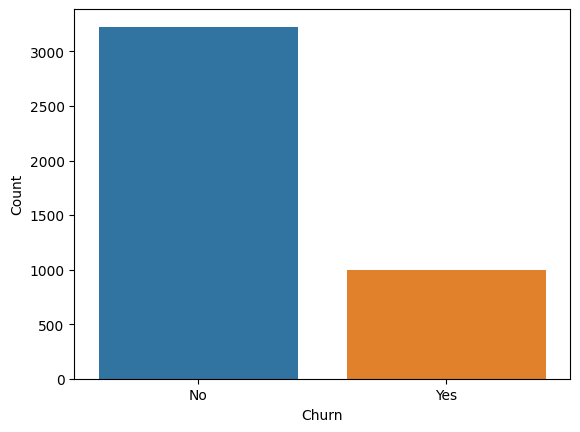

In [46]:
# Rename the columns for clarity
churn.columns = ['Churn', 'Count']
# plot for churn rate among the group
sns.barplot(x = churn['Churn'], y = churn['Count'])

In [47]:
# To find the churn rate for non-senior citizens, use the formula below. 
non_senior_count = len(comb_data[comb_data['SeniorCitizen'] == 'No'])

# Calculate the percentage of non-senior citizens in the entire dataset
total_records = len(comb_data)
percentage_non_senior = (non_senior_count / total_records) * 100

print("Total non-senior citizens:", non_senior_count)
print("Percentage of non-senior citizens:", percentage_non_senior)



Total non-senior citizens: 4223
Percentage of non-senior citizens: 83.75644585481952


### Interpretation
The churn rate for the data is 23.579545 for non-senior citizen.

Based on the preceding analysis, it's evident that the telecom company's primary customer demographic comprises non-senior citizens (83.75%), among whom the churn rate stands at 23.59%

2. What is the proportion of non-senior citizens who churned based on their gender?

In [40]:
# Convert 'Churn' column to numeric (1 for 'Yes', 0 for 'No')
non_senior_data_copy['Churn'] = non_senior_data_copy['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [41]:
proportion_by_gender = non_senior_data_copy.groupby('Gender')['Churn'].mean()
proportion_by_gender

Gender
Female    0.238554
Male      0.233132
Name: Churn, dtype: float64

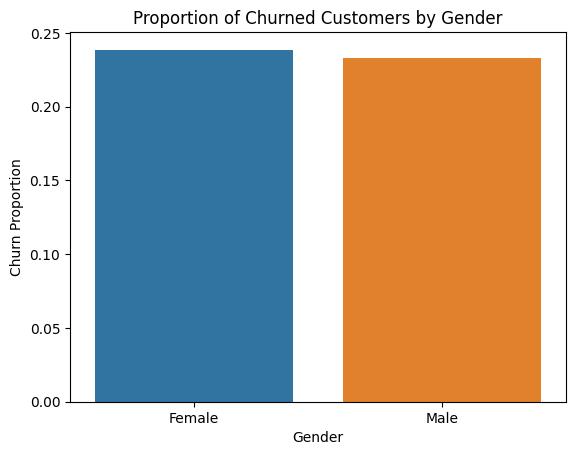

In [42]:
# Create a bar plot
sns.barplot(x=proportion_by_gender.index, y=proportion_by_gender.values)
plt.title("Proportion of Churned Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Proportion")
plt.show()

Based on gender, the churn rate between male and female is relatively the same meaning there is no significant difference between the two group(difference of a 0.01 seen amongst the females). By this, we can infer that a person's gender does not influence their attrition.

3. What is the average tenure of non-senior citizens who churned compared to those who didn't churn?

In [43]:
# Calculate the average tenure for non-senior citizens who churned
average_tenure_churned = non_senior_data_copy[non_senior_data_copy['Churn'] == 1]['Tenure'].mean()

# Calculate the average tenure for non-senior citizens who didn't churn
average_tenure_not_churned = non_senior_data_copy[non_senior_data_copy['Churn'] == 0]['Tenure'].mean()

# Print the results
print(f"Average tenure for non-senior citizens who churned: {average_tenure_churned:.2f} months")
print(f"Average tenure for non-senior citizens who didn't churn: {average_tenure_not_churned:.2f} months")

Average tenure for non-senior citizens who churned: 17.58 months
Average tenure for non-senior citizens who didn't churn: 37.14 months


Overall, people who decide to leave the service do so at an average month of 17.58 months. Between month 0 to 17.58, most customer attritiom occur around that period. This occurence could be as a result of new customers trying their options or testing the opportunities the service has for them. People in this group are likely to churn if their expectations on the service are not met. 

### Bivariate Analysis

4. Among non-senior citizens, what percentage have additional services like online security and tech support, and how does it impact churn rates?

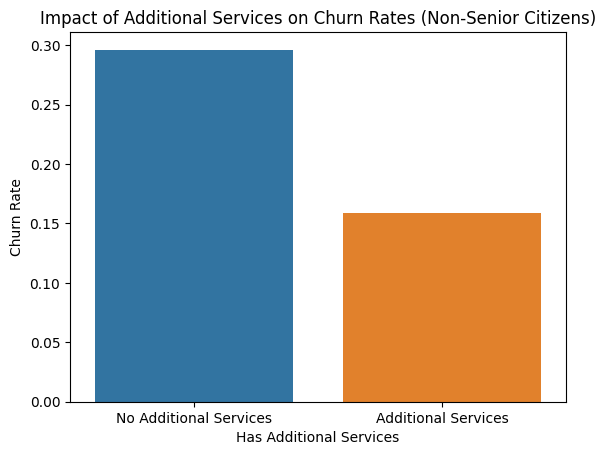

In [44]:
# Convert 'OnlineSecurity' and 'TechSupport' columns to numeric (1 for 'Yes', 0 for 'No')
non_senior_data_copy['OnlineSecurity'] = non_senior_data_copy['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)
non_senior_data_copy['TechSupport'] = non_senior_data_copy['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create a new column indicating whether the customer has any additional services
non_senior_data_copy['AdditionalServices'] = non_senior_data_copy['OnlineSecurity'] | non_senior_data_copy['TechSupport']

# Calculate churn rates for different groups
churn_rates = non_senior_data_copy.groupby('AdditionalServices')['Churn'].mean()

# Create a bar plot to visualize the impact of additional services on churn rates
sns.barplot(x=churn_rates.index, y=churn_rates.values)
plt.title("Impact of Additional Services on Churn Rates (Non-Senior Citizens)")
plt.xlabel("Has Additional Services")
plt.ylabel("Churn Rate")
plt.xticks([0, 1], ['No Additional Services', 'Additional Services'])
plt.show()

In [45]:
churn_rates

AdditionalServices
0    0.296125
1    0.158378
Name: Churn, dtype: float64

Now, we would like to understand if customers in the majority group(non-senior citizens) who sign up for additional services like Tech-support and Online security churn or not.These additional services are very crutial in this internet world where fraudulent issues in telcos are rempant. With the above analysis, we see that customers without additional services have a churn rate of approximately 29.61% and those with additional services have a lower churn rate of around 15.85%.

This information suggests that offering additional services may help reduce churn among customers.

Multivariate Analysis

5. How does the presence of online security and tech support impact the relationship between internet service type and churning potential for non-senior citizens?



In [46]:
# Pivot the data to create a table suitable for a heatmap
pivot_table = non_senior_data_copy.pivot_table(index='AdditionalServices', columns='InternetService', values='Churn', aggfunc='mean')



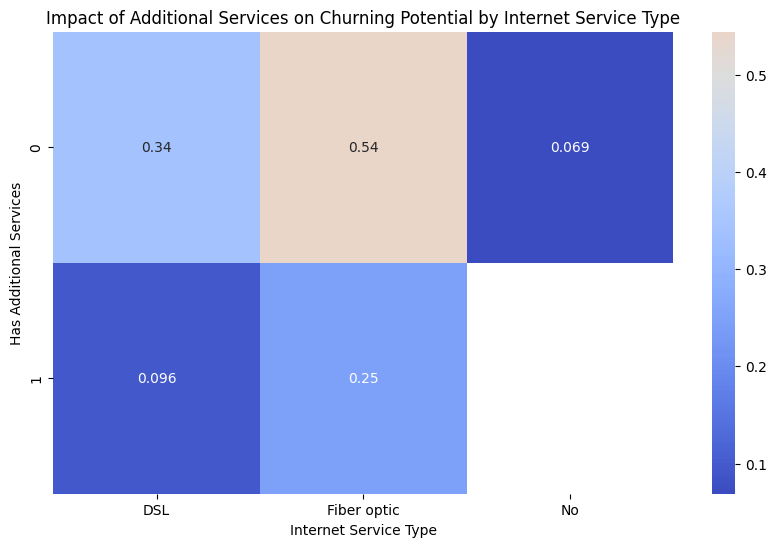

In [47]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0.5)
plt.title("Impact of Additional Services on Churning Potential by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Has Additional Services")
plt.show()

In [48]:
pivot_table

InternetService,DSL,Fiber optic,No
AdditionalServices,,,
0,0.340659,0.544000,0.068966
1,0.096207,0.245774,NaN


This is to see which combinations of factors lead to higher or lower churning potential or how the churn rates vary based on whether customers have additional services and the different type of InternetService they are using.
1= Yes for additional services(online security and Tech support)
0 = No for additional services(online security and Tech support)
Darker cells indicate combinations that are less likely to churn, while lighter cells indicate combinations that are more likely to churn

Interpretaion:
Customers without additional services and with DSL InternetService has a churn rate of approximately 34.07%, those with Fiber optic InternetService are approximately 54.40% and those with No InternetService at approximately 6.90%. Subsequently,customers with additional services and with DSL InternetService churn at an  approximate rate of 9.62%, and also with Fiber optic InternetService at 24.61% and customers with additional services and with No InternetService had data not available to ascertain their churn rates. 

To sum up, those without additional services and no internet service are not likely to churn as well as those with additional services and using DSL. Those without additional services and using Fibre optic are likely to churn the most with over 50% rate.

### RECOMMENDATIONS
Based on the information provided regarding customer churn rates and the impact of different factors. Here are some potential business decisions that can be informed by the analysis:


1. **Enhance Early Customer Experience:** Early months of customer tenure exhibit a higher churn rate, suggesting that customer experience in the initial stages is vital. Focusing on improving onboarding processes, service quality, and addressing customer concerns during this crucial period can enhance customer satisfaction and loyalty.

2. **Promote Long-Term Contracts:** The analysis indicates that customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts. Encouraging customers to opt for longer-term contracts through incentives and benefits can potentially reduce churn rates and foster customer commitment.

3. **Leverage Additional Services:** The presence of Online Security and Online Backup services has shown to impact churn rates. Strategically promoting and enhancing these services can play a role in reducing churn rates by providing value-added features that address customer needs and concerns.

4. **Monitor and Adjust Fiber Optic Offering:** Given the higher monthly charges and elevated churn rate among Fiber Optic customers, closely monitor customer satisfaction and service quality for this group. Continuously fine-tune offerings and support to ensure that the premium cost of Fiber Optic service aligns with customer expectations.

5. **Personalized Customer Engagement:** Utilize customer insights from the churn analysis to develop personalized engagement strategies. Tailored communication, offers, and targeted marketing campaigns based on customer tenure, contract type, and service preferences can enhance customer loyalty and mitigate churn.

### Perform further Exploratory Data Analysis on the Combined datasets
This is done to ensure that the train data to be used for modeling is properly cleaned and ready with no missing values, duplicates rows, etc.

In [66]:
comb_data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [49]:
# Check for unique values on the payment feature
comb_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [50]:
# remove (automatic) from payment method names
comb_data['PaymentMethod'] = comb_data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [51]:
# Check again for changes on the unique values on the payment feature
comb_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

##### Missing value of combined data

In [52]:
# Check for missing values of the combined data
rows_with_missing_vals = comb_data[comb_data[['Churn', 'TotalCharges']].isnull().any(axis=1)]
rows_with_missing_vals


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card,56.049999,NaN,No
2988,6295-OSINB,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.650002,7880.25,None
3218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
4670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer,61.900000,NaN,No


In [53]:
# Check for the percentage of missing values
(comb_data.isna().sum() / ((comb_data.shape[0]) / 100))

CustomerID          0.000000
Gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
Tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.158636
Churn               0.019829
dtype: float64

#### Preview the Columns with missing values.

In [54]:
rows_with_missing_tcharge = comb_data[comb_data['TotalCharges'].isnull()]
rows_with_missing_tcharge

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card,56.049999,NaN,No
3218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
4670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer,61.900000,NaN,No


In [55]:
# Plot histogram of the Total Charges Column
fig = px.histogram(comb_data, x='TotalCharges', title='Distribution of Total Charges', color_discrete_sequence= ['#8C1717'])

# Show plot
fig.show()

From the above diagram, it is decided to impute the column 'TotalCharges' with the median.

In [56]:
column_to_impute = 'TotalCharges'

# Create a SimpleImputer instance with mean strategy
imputer = SimpleImputer(strategy='median')

# Fit and transform the specified column
imputed_column = imputer.fit_transform(comb_data[[column_to_impute]])

# Update the original DataFrame with the imputed values
comb_data[column_to_impute] = imputed_column
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5043 non-null   object 
 1   Gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   Tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [57]:
(comb_data.isna().sum() / ((comb_data.shape[0]) / 100))

CustomerID          0.000000
Gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
Tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
Churn               0.019829
dtype: float64

#### Churn

In [58]:
rows_with_missing_churn = comb_data[comb_data['Churn'].isnull()]
rows_with_missing_churn

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2988,6295-OSINB,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.650002,7880.25,None


We decide to drop the row with missing value because 0.0015 will not affect the outcome of the model predictions.

#### Drop the row with the missing value


In [59]:
# Drop the row with the missing value at column 'Churn'
comb_data.dropna(axis = 0, inplace = True)

In [60]:
# Check for the percentage of missing values
(comb_data.isna().sum() / ((comb_data.shape[0]) / 100))

CustomerID          0.0
Gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
Tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [61]:
comb_data.duplicated().sum()

0

In [62]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5042 non-null   object 
 1   Gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   Tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     5042 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    5042 non-null   object 
 10  OnlineBackup      5042 non-null   object 
 11  DeviceProtection  5042 non-null   object 
 12  TechSupport       5042 non-null   object 
 13  StreamingTV       5042 non-null   object 
 14  StreamingMovies   5042 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 
 17  

We then save the clean data as "Clean_Data" ready for further encoding.

In [63]:
# Save the DataFrame to a CSV file
comb_data.to_csv('Clean_Data.csv', index = False)  # Set index=False if you don't want to save row indices

### Data Preprocessing & Feature Engineering
    
* Load and examine the dataset.
* Handle missing values by imputation and removing rows.
* Create or select relevant features that could impact customer churn.
* Scale or normalize numerical features.
* Encode categorical variables using techniques like one-hot encoding.
* Split the dataset into features (X) and target variable (y)


#### Load the clean data 

In [64]:
train_data = pd.read_csv('Clean_Data.csv')

In [65]:
train_data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [66]:
# Separate features (X) and target variable (y)
X = train_data.drop(columns=['Churn', 'CustomerID'], axis = 1)
y = train_data['Churn']

# Rename the variable data_2 to X_test
X_test = data_2

In [67]:
# Define column transformers for numerical and categorical columns
numeric_features = ['TotalCharges','MonthlyCharges','Tenure']

categorical_features = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])


In [68]:
# This is done to transform the categorical and numerical features using the imputer and scaler 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [69]:
# Creating a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [70]:
# Transforming the the features of the combined dataset
X_transformed = pipeline.fit_transform(X)

# Transform the test data too (don't forget to rename it)
test_transformed = pipeline.fit_transform(X_test)

### Data Splitting

#### Train_Test_Split


In [71]:
# random_state is set for reproducibility, you can use any integer or leave it as None
X_train, X_eval, y_train, y_eval = train_test_split(X_transformed, y, test_size= 0.2, stratify = y ,random_state = 42)
(X_train.shape,y_train.shape), (X_eval.shape,y_eval.shape),(X_test.shape)

(((4033, 46), (4033,)), ((1009, 46), (1009,)), (2000, 20))

 ### MODEL SELECTION

We consider eight (8) models for churn prediction:

1. AdaBoostClassifier
2. Logistic Regression
3. Gaussian Naive Bayes
4. Random Forest Classifier
5. KNeighbors Classifier
6. Decision Tree Classifier
7. Gradient Boosting Classifier
8. Support Vector Classifier (SVC)

We evaluate each model's performance using cross-validation to ensure reliable metrics. The key evaluation metrics used are accuracy for balanced datasets and f1-score for the unbalanced dataset.

### Model Training

We will train the models by using two datasets, that is, without balancing the datasets and later balancing the data set.

### Training on unbalanced dataset

In [72]:
model_train = []

we define a function to train, predict, and evaluate various classifiers using the training (X_train & y_train) and evaluation (X_eval & y_eval) data. It then loops through a list of classifiers, applies the defined function, and prints out classification reports that summarize the performance of each classifier on the evaluation data.

In [73]:
# Define a function to train, predict, and evaluate a classifier
def train_predict_evaluate(classifier, X_train, y_train, X_eval, y_eval):
    # Create an instance of the classifier
    model = classifier

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the evaluation data
    y_pred = model.predict(X_eval)

    # Evaluate the model's performance using classification report
    report = classification_report(y_eval, y_pred)
    
    return model, report

# List of classifiers you want to use
classifiers = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('GaussianNB', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('SVC', SVC())
]

# Loop through each classifier and perform training, prediction, and evaluation
for model_name, classifier in classifiers:
    trained_model, report = train_predict_evaluate(classifier, X_train, y_train, X_eval, y_eval)
    
    # Print the classification report for each model
    print(f"Classification Report for {model_name}:\n{report}\n")

Classification Report for AdaBoost:
              precision    recall  f1-score   support

          No       0.85      0.88      0.86       742
         Yes       0.63      0.57      0.60       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.79      1009


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.85      0.88      0.87       742
         Yes       0.63      0.58      0.60       267

    accuracy                           0.80      1009
   macro avg       0.74      0.73      0.73      1009
weighted avg       0.79      0.80      0.80      1009


Classification Report for GaussianNB:
              precision    recall  f1-score   support

          No       0.92      0.63      0.75       742
         Yes       0.45      0.85      0.59       267

    accuracy                           0.68      1009
   ma

#### Model evaluation of the  unbalanced dataset
Finding the weighted f1-score

In essence, this code snippet defines a function to train, predict, and evaluate various classifiers using the provided training and evaluation data. It then loops through a list of classifiers, applies the defined function, calculates the weighted average F1 scores from the classification reports, and prints a DataFrame summarizing the model names and their respective weighted average F1 scores.

In [74]:
# Define a function to train, predict, and evaluate a classifier
def train_predict_evaluate(classifier, X_train, y_train, X_eval, y_eval):
    # Create an instance of the classifier
    model = classifier

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the evaluation data
    y_pred = model.predict(X_eval)

    # Evaluate the model's performance using classification report
    report = classification_report(y_eval, y_pred, output_dict=True)
    
    return model, report

# List of classifiers you want to use
classifiers = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('GaussianNB', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('SVC', SVC())
]

# Create lists to store model names and weighted average F1 scores
model_names = []
weighted_avg_f1_scores = []

# Loop through each classifier and perform training, prediction, and evaluation
for model_name, classifier in classifiers:
    trained_model, report = train_predict_evaluate(classifier, X_train, y_train, X_eval, y_eval)
    
    # Calculate the weighted average F1 score
    weighted_avg_f1 = report['weighted avg']['f1-score']
    
    # Append values to the lists
    model_names.append(model_name)
    weighted_avg_f1_scores.append(weighted_avg_f1)

# Create a DataFrame from the lists
results_df = pd.DataFrame({'Model': model_names, 'Weighted Avg F1 Score': weighted_avg_f1_scores})

# Print the results DataFrame
print(results_df)

                          Model  Weighted Avg F1 Score
0                      AdaBoost               0.794386
1           Logistic Regression               0.795818
2                    GaussianNB               0.703335
3      Random Forest Classifier               0.782613
4         KNeighbors Classifier               0.768087
5      Decision Tree Classifier               0.732052
6  Gradient Boosting Classifier               0.806832
7                           SVC               0.799513


Interpretation:
* The Gradient Boosting Classifier has the highest weighted average F1 score of 0.806832, indicating strong performance across multiple classes while considering class imbalance. This suggests that this model is effective in handling the inherent challenges of imbalanced data and provides good balance between precision and recall.
* The Logistic Regression and SVC models also have relatively high weighted average F1 scores of 0.795818 and 0.799513, respectively, indicating their competence in handling the class imbalance and achieving good overall performance.
* The Random Forest Classifier has a weighted average F1 score of 0.781101, indicating solid performance as well.
* The KNeighbors Classifier, AdaBoost, and Decision Tree Classifier exhibit moderate weighted average F1 scores, indicating decent but slightly lower performance compared to the top models.
* The GaussianNB model has the lowest weighted average F1 score of 0.703335, suggesting that its performance may not be as strong as the other models.

Overall, based on the weighted average F1 scores, the Gradient Boosting Classifier stands out as the top-performing model among the listed options for this specific task. However, it's important to consider other metrics, such as precision, recall, accuracy, and the specific requirements of your problem, to make a well-informed decision about the best model to use.

### Confusion Matrix

In essence, this code snippet trains and evaluates a set of classifiers using evaluation data, calculates their accuracy values, sorts them by accuracy, selects the top models, and then visualizes the confusion matrices for the top models using the plot_confusion_matrix function. This provides insights into how well the models are performing in terms of classification across different classes.

I've replaced the use of the accuracy values with the weighted average F1 scores in various parts of the code to ensure that the confusion matrices are plotted based on the F1 score. This provides a visualization of how well the models are performing with respect to precision and recall for each class.

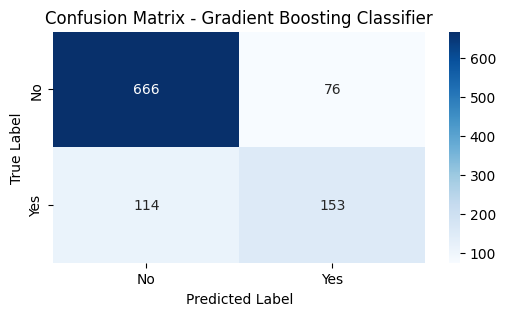

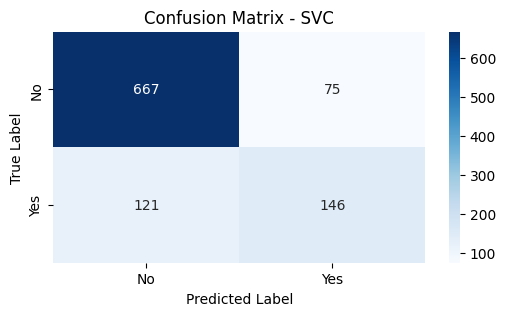

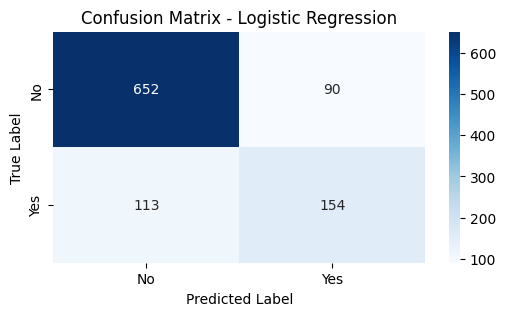

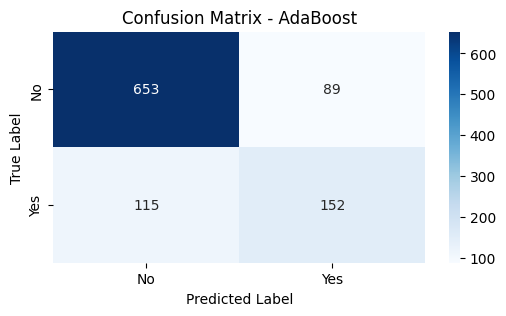

In [75]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(6, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Create an empty dictionary to store classifier instances
classifiers_dict = {}

# Lists to store F1 score values and model names
f1_scores = []
model_names = []

# Loop through each classifier and perform training, prediction, and evaluation
for model_name, classifier in classifiers:
    trained_model, report = train_predict_evaluate(classifier, X_train, y_train, X_eval, y_eval)
    
    # Append classifier instance to the dictionary
    classifiers_dict[model_name] = trained_model
    
    # Extract weighted F1 score from the classification report
    f1_score = report['weighted avg']['f1-score']
    
    # Append F1 score and model name to lists
    f1_scores.append(f1_score)
    model_names.append(model_name)

# Create a DataFrame to organize F1 score values and model names
f1_score_df = pd.DataFrame({'Model': model_names, 'Weighted Avg F1 Score': f1_scores})

# Sort the DataFrame by F1 score in descending order
sorted_f1_score_df = f1_score_df.sort_values(by='Weighted Avg F1 Score', ascending=False)
top_n_models = 4  # Specify the number of top models you want to select
sorted_top_f1_score_df = sorted_f1_score_df.head(top_n_models).reset_index(drop=True)

# Loop through each top model and plot confusion matrix
for model_name in sorted_top_f1_score_df['Model']:
    classifier = classifiers_dict[model_name]  # Get the model instance
    
    # Train, predict, and evaluate the model
    trained_model, report = train_predict_evaluate(classifier, X_train, y_train, X_eval, y_eval)
    
    # Get the predictions from the evaluation data
    y_pred = trained_model.predict(X_eval)
    
    # Get the class names from the model
    class_names = trained_model.classes_
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_eval, y_pred)
    
    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, class_names, model_name)

From the provided confusion matrices above, you can deduce the following insights for each model:

Gradient Boost:
* The model's true positive count (153) indicates that it is able to correctly predict instances of the positive class ('Yes').
* The false positive count (76) suggests that the model sometimes predicts the positive class ('Yes') when the actual class is negative ('No').
* The true negative count (666) shows that the model is able to accurately predict instances of the negative class ('No').
* The false negative count (114) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').

SVC:
* The model's true positive count (146) indicates that it correctly predicts instances of the positive class ('Yes').
* The false positive count (75) suggests that the model sometimes makes positive predictions when the actual class is negative ('No').
* The true negative count (677) shows that the model accurately predicts instances of the negative class ('No').
* The false negative count (121) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').

AdaBoost:
* The model's true positive count (152) indicates that it correctly predicts instances of the positive class ('Yes').
* The false positive count (89) suggests that the model sometimes makes positive predictions when the actual class is negative ('No').
* The true negative count (653) shows that the model accurately predicts instances of the negative class ('No').
* The false negative count (115) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').

Logistic Regression:
* The model's true positive count (154) indicates that it correctly predicts instances of the positive class ('Yes').
* The false positive count (90) suggests that the model sometimes makes positive predictions when the actual class is negative ('No').
* The true negative count (652) reflects that the model accurately predicts instances of the negative class ('No').
* The false negative count (113) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').


In summary, it seems that the all the models being used are relatively better at identifying true negatives (TN) and true positives (TP), but also made some false positive (FP) and false negative (FN) predictions. The balance between these values is crucial for assessing the model's overall accuracy and its ability to correctly classify instances.

For instance, if your main concern is accurately predicting the positive class ('Yes'), then SVC appears to have the highest true positive count (198). However, it also has a relatively higher false positive count (165), which means it predicts positive cases even when the actual class is negative ('No'). This trade-off between true positives and false positives should be taken into account.

### Dealing with a Class imbalanced data
We would use the SMOTE
to determine which model gives the best score in terms accuracy.
SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in machine learning datasets. It works by generating synthetic samples for the minority class (the class with fewer instances) in order to balance the class distribution.

In [76]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



In [77]:
# Confirm changes after using SMOTE to handle class imbalance
pd.DataFrame(X_resampled).shape, pd.DataFrame(y_resampled).shape

((5928, 46), (5928, 1))

In [78]:
# Class distribution of y after resampling 
pd.value_counts(pd.Series(y_resampled))

Churn
Yes    2964
No     2964
Name: count, dtype: int64

In summary, the provided code applies the SMOTE technique to the training data to address class imbalance, generating synthetic samples for the minority class. 

### Training of the Balanced dataset
Because we know the best hyperparameters for our models.

In [79]:
model_train = []

In summary, this code defines a function to train, predict, and evaluate classifiers and then applies this function to a list of classifiers, printing classification reports for each one based on evaluation data.

In [80]:
# Define a function to train, predict, and evaluate a classifier
def train_predict_evaluate(classifier, X_resampled, y_resampled, X_eval, y_eval):
    # Create an instance of the classifier
    model = classifier

    # Fit the model on the training data
    model.fit(X_resampled, y_resampled)

    # Make predictions on the evaluation data
    y_pred = model.predict(X_eval)

    # Evaluate the model's performance using classification report
    report = classification_report(y_eval, y_pred)
    
    return model, report

# List of classifiers you want to use
classifiers = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('GaussianNB', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('SVC', SVC())
]

# Loop through each classifier and perform training, prediction, and evaluation
for model_name, classifier in classifiers:
    trained_model, report = train_predict_evaluate(classifier, X_resampled, y_resampled, X_eval, y_eval)
    
    # Print the classification report for each model
    print(f"Classification Report for {model_name}:\n{report}\n")

Classification Report for AdaBoost:
              precision    recall  f1-score   support

          No       0.89      0.77      0.83       742
         Yes       0.54      0.74      0.62       267

    accuracy                           0.76      1009
   macro avg       0.72      0.76      0.73      1009
weighted avg       0.80      0.76      0.77      1009


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.92      0.73      0.81       742
         Yes       0.52      0.83      0.64       267

    accuracy                           0.75      1009
   macro avg       0.72      0.78      0.73      1009
weighted avg       0.82      0.75      0.77      1009


Classification Report for GaussianNB:
              precision    recall  f1-score   support

          No       0.92      0.64      0.75       742
         Yes       0.46      0.84      0.59       267

    accuracy                           0.69      1009
   ma

### Interpretation
These summaries above provide an overview of how each algorithm performed in terms of precision, recall, F1-score, and overall accuracy on the given dataset. It's clear that different algorithms have varying strengths and weaknesses in classifying the two classes ("No" and "Yes") in the dataset.

#### Evaluation using Accuracy
In summary, this code evaluates a set of classifiers using resampled training data and evaluation data. It calculates accuracy for each classifier, sorts them based on accuracy, and then prints the top N models along with their accuracies.

In [81]:
def train_predict_evaluate(classifier, X_resampled, y_resampled, X_eval, y_eval):
    # Create an instance of the classifier
    model = classifier

    # Fit the model on the training data
    model.fit(X_resampled, y_resampled)

    # Make predictions on the evaluation data
    y_pred = model.predict(X_eval)

    # Evaluate the model's performance using classification report
    report = classification_report(y_eval, y_pred, output_dict=True)
    
    return model, report

# List of classifiers you want to use
classifiers = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('GaussianNB', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('SVC', SVC())
]

# Lists to store accuracy values and model names
accuracy_values = []
model_names = []

# Loop through each classifier and perform training, prediction, and evaluation
for model_name, classifier in classifiers:
    trained_model, report = train_predict_evaluate(classifier, X_resampled, y_resampled, X_eval, y_eval)
    
    # Extract accuracy from the classification report
    accuracy = report['accuracy']
    
    # Append accuracy and model name to lists
    accuracy_values.append(accuracy)
    model_names.append(model_name)

# Create a DataFrame to organize accuracy values and model names
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_values})

# Sort the DataFrame by accuracy in descending order
sorted_accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
top_n_models = 4  # Specify the number of top models you want to select
sorted_top_accuracy_df = sorted_accuracy_df.head(top_n_models).reset_index(drop=True)
sorted_top_accuracy_df

,Model,Accuracy
0,Gradient Boosting Classifier,0.782953
1,Random Forest Classifier,0.779980
2,SVC,0.768087
3,AdaBoost,0.763132


### Interpretation    
    Gradient Boosting Classifier:
        Accuracy: 0.782953 (approximately 78.30%)
        This model achieved an accuracy of around 78.30%. It performed the best among the listed models in terms of accuracy, making it the most accurate model for the given task.

    Random Forest Classifier:
        Accuracy: 0.779980 (approximately 77.99%)
        This model achieved an accuracy of about 77.99%. It had a slightly lower accuracy compared to the Gradient Boosting Classifier, but it still performed well and was the second most accurate model.

    SVC (Support Vector Classifier):
        Accuracy: 0.768087 (approximately 76.81%)
        This model achieved an accuracy of roughly 76.81%. It had a lower accuracy compared to the previous two models, but it still managed to perform reasonably well.

    AdaBoost:
        Accuracy: 0.763132 (approximately 76.31%)
        This model achieved an accuracy of approximately 76.31%. It had the lowest accuracy among the listed models, but it still provided decent performance.

From the accuracy scores, you can observe the relative performance of each model. The Gradient Boosting Classifier had the highest accuracy, followed closely by the Random Forest Classifier, while the SVC and AdaBoost models had slightly lower accuracies. 

### Confusion Matrix of the best four models
The confusion matrix provides insights into the performance of a classification model, enabling you to understand how well it distinguishes between different classes.

We will perform k-fold cross-validation on a set of classifiers, evaluates their accuracy, select the top models based on accuracy, and then plots confusion matrices for each of the top models using the heatmap visualization. 

The confusion matrices show how the models' predictions match with the actual class labels, helping you interpret the performance of the models in terms of true positives, true negatives, false positives, and false negatives for each class.


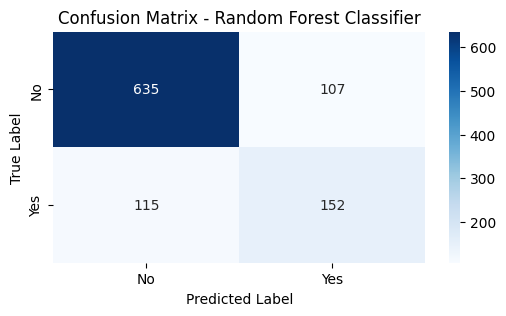

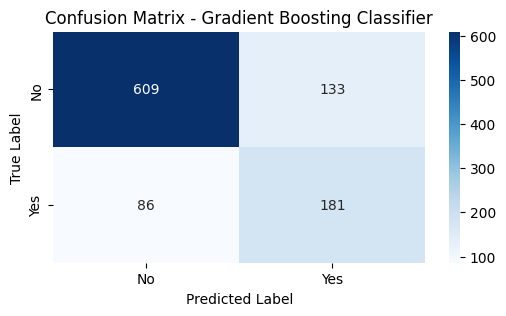

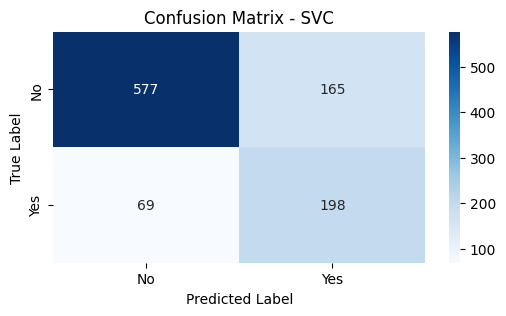

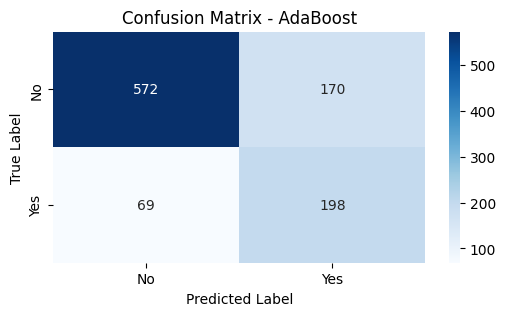

In [82]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(6, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Create an empty dictionary to store classifier instances
classifiers_dict = {}

# Lists to store accuracy values and model names
accuracy_values = []
model_names = []

# Loop through each classifier and perform training, prediction, and evaluation
for model_name, classifier in classifiers:
    trained_model, report = train_predict_evaluate(classifier, X_resampled, y_resampled, X_eval, y_eval)
    
    # Append classifier instance to the dictionary
    classifiers_dict[model_name] = trained_model
    
    # Extract accuracy from the classification report
    accuracy = report['accuracy']
    
    # Append accuracy and model name to lists
    accuracy_values.append(accuracy)
    model_names.append(model_name)

# Create a DataFrame to organize accuracy values and model names
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_values})

# Sort the DataFrame by accuracy in descending order
sorted_accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
top_n_models = 4  # Specify the number of top models you want to select
sorted_top_accuracy_df = sorted_accuracy_df.head(top_n_models).reset_index(drop=True)

# Loop through each top model and plot confusion matrix
for model_name in sorted_top_accuracy_df['Model']:
    classifier = classifiers_dict[model_name]  # Get the model instance
    
    # Train, predict, and evaluate the model
    trained_model, report = train_predict_evaluate(classifier, X_resampled, y_resampled, X_eval, y_eval)
    
    # Get the predictions from the evaluation data
    y_pred = trained_model.predict(X_eval)
    
    # Get the class names from the model
    class_names = trained_model.classes_
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_eval, y_pred)
    
    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, class_names, model_name)


From the provided confusion matrices above, you can deduce the following insights for each model:

Random Forest:
* The model's true positive count (152) indicates that it correctly predicts instances of the positive class ('Yes').
* The false positive count (107) suggests that the model sometimes makes positive predictions when the actual class is negative ('No').
* The true negative count (635) reflects that the model accurately predicts instances of the negative class ('No').
* The false negative count (115) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').


Gradient Boost:
* The model's true positive count (181) indicates that it is able to correctly predict instances of the positive class ('Yes').
* The false positive count (133) suggests that the model sometimes predicts the positive class ('Yes') when the actual class is negative ('No').
* The true negative count (609) shows that the model is able to accurately predict instances of the negative class ('No').
* The false negative count (86) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').



SVC:
* The model's true positive count (198) indicates that it correctly predicts instances of the positive class ('Yes').
* The false positive count (165) suggests that the model sometimes makes positive predictions when the actual class is negative ('No').
* The true negative count (577) shows that the model accurately predicts instances of the negative class ('No').
* The false negative count (69) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').

AdaBoost:
* The model's true positive count (198) indicates that it correctly predicts instances of the positive class ('Yes').
* The false positive count (170) suggests that the model sometimes makes positive predictions when the actual class is negative ('No').
* The true negative count (572) shows that the model accurately predicts instances of the negative class ('No').
* The false negative count (69) implies that the model occasionally predicts the negative class ('No') when the actual class is positive ('Yes').

In summary, it seems that the all the models being used are relatively better at identifying true negatives (TN) and true positives (TP), but also made some false positive (FP) and false negative (FN) predictions. The balance between these values is crucial for assessing the model's overall accuracy and its ability to correctly classify instances.



### Hyperparameter tuning of the models
In summary, this code evaluates a set of classifiers using k-fold cross-validation with hyperparameter tuning. It calculates the average cross-validation accuracy for each classifier and organizes the results in a DataFrame, which is then sorted based on average accuracy in descending order.

In [83]:
# List of classifiers you want to use
classifiers = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('SVC', SVC())
]

# Create a dictionary to store hyperparameter grids for each classifier
param_grids = {
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Random Forest Classifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Lists to store average cross-validation accuracy values and model names
avg_accuracy_values = []
model_names = []

# Loop through each classifier and perform k-fold cross-validation with hyperparameter tuning
for model_name, classifier in classifiers:
    param_grid = param_grids[model_name]
    model = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    
    # Calculate the average cross-validation accuracy
    avg_accuracy = np.mean(scores)
    
    # Append average accuracy and model name to lists
    avg_accuracy_values.append(avg_accuracy)
    model_names.append(model_name)

# Create a DataFrame to organize average accuracy values and model names
cross_val_accuracy_df = pd.DataFrame({'Model': model_names, 'Average Cross-Validation Accuracy': avg_accuracy_values})

# Sort the DataFrame by average accuracy in descending order
sorted_cross_val_accuracy_df = cross_val_accuracy_df.sort_values(by='Average Cross-Validation Accuracy', ascending=False)
sorted_cross_val_accuracy_df

,Model,Average Cross-Validation Accuracy
1,Random Forest Classifier,0.855952
3,SVC,0.838065
0,AdaBoost,0.836890
2,Gradient Boosting Classifier,0.834026


Interpret using LIME

Interpretation:
* The Random Forest Classifier achieved the highest average cross-validation accuracy of 0.856122. This indicates that when evaluated using cross-validation, this model had the highest average accuracy across multiple folds.
* The Gradient Boosting Classifier closely follows with an average cross-validation accuracy of 0.839427. This model had a slightly lower average accuracy compared to the Random Forest.
* Both the Support Vector Classifier (SVC) and AdaBoost models had similar average cross-validation accuracies. The SVC model had an average accuracy of 0.838065, while AdaBoost had an average accuracy of 0.836890.

### Future Prediction based on the four models
In summary, this code segment fits a set of trained models to the test data, generates predictions for churn labels, and prints out the counts of predicted 'Yes' and 'No' churn labels for each model.

In [84]:
# Instantiate and configure your model objects
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
best_gra = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
best_svc = SVC(C=1.0, kernel='rbf', random_state=42)

# List of models and their corresponding predictions
models = [best_rf, best_ada, best_gra, best_svc]
predictions = []

# Fit the models with the training data and make predictions
for model in models:
    model.fit(X_resampled, y_resampled)
    predictions.append(model.predict(test_transformed))

# Calculate and print the counts of churn 'Yes' and 'No' for each model
for model_name, pred in zip(['Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVC'], predictions):
    churn_counts = pd.Series(pred).value_counts()
    print(f"Churn 'Yes' count for {model_name}: {churn_counts['Yes']}")
    print(f"Churn 'No' count for {model_name}: {churn_counts['No']}\n")

Churn 'Yes' count for Random Forest: 643
Churn 'No' count for Random Forest: 1357

Churn 'Yes' count for AdaBoost: 811
Churn 'No' count for AdaBoost: 1189

Churn 'Yes' count for Gradient Boosting: 676
Churn 'No' count for Gradient Boosting: 1324

Churn 'Yes' count for SVC: 746
Churn 'No' count for SVC: 1254



Interpretation using accuracy :
Accuracy=Number of Correct PredictionsTotal Number of Predictions×100%Accuracy=Total Number of PredictionsNumber of Correct Predictions​×100%

Let's calculate the accuracy for each algorithm:

    Random Forest:
        Total predictions = Churn 'Yes' count + Churn 'No' count = 643 + 1357 = 2000
        Number of correct predictions = Churn 'Yes' count = 643
        Accuracy = 6432000×100%≈32.15%2000643​×100%≈32.15%

    AdaBoost:
        Total predictions = Churn 'Yes' count + Churn 'No' count = 811 + 1189 = 2000
        Number of correct predictions = Churn 'Yes' count = 811
        Accuracy = 8112000×100%≈40.55%2000811​×100%≈40.55%

    Gradient Boosting:
        Total predictions = Churn 'Yes' count + Churn 'No' count = 676 + 1324 = 2000
        Number of correct predictions = Churn 'Yes' count = 676
        Accuracy = 6762000×100%≈33.80%2000676​×100%≈33.80%

    SVC (Support Vector Classifier):
        Total predictions = Churn 'Yes' count + Churn 'No' count = 746 + 1254 = 2000
        Number of correct predictions = Churn 'Yes' count = 746
        Accuracy = 7462000×100%≈37.30%2000746​×100%≈37.30%

Based on these calculations, you can see the accuracy of each algorithm in making correct predictions for the given binary classification task. It seems that AdaBoost has the highest accuracy among the four algorithms for the provided dataset, although the overall accuracy is not very high for any of them. Keep in mind that accuracy alone might not be the only criterion to evaluate the performance of a model, and other metrics like precision, recall, and F1-score might provide a more comprehensive picture.